In [20]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("C:/Users/destr/Desktop/DNA Promoter Gene Prediction Data/promoters.data", names=['Promoter', 'Name', 'Gene'])

In [3]:
df

,Promoter,Name,Gene
0,+,S10,\t\ttactagcaatacgcttgcgttcggtggttaagtatgtataat...
1,+,AMPC,\t\ttgctatcctgacagttgtcacgctgattggtgtcgttacaat...
2,+,AROH,\t\tgtactagagaactagtgcattagcttatttttttgttatcat...
3,+,DEOP2,\taattgtgatgtgtatcgaagtgtgttgcggagtagatgttagaa...
4,+,LEU1_TRNA,\ttcgataattaactattgacgaaaagctgaaaaccactagaatgc...
...,...,...,...
101,-,799,\t\tcctcaatggcctctaaacgggtcttgaggggttttttgctga...
102,-,987,\t\tgtattctcaacaagattaaccgacagattcaatctcgtggat...
103,-,1226,\t\tcgcgactacgatgagatgcctgagtgcttccgttactggatt...
104,-,794,\t\tctcgtcctcaatggcctctaaacgggtcttgaggggtttttt...


In [4]:
df['Gene'] = [seq.replace("\t", "").strip() for seq in df['Gene']]
df['Gene'] = [seq.replace(" ", "").strip() for seq in df['Gene']]

# Split sequences into lists of characters
seq = df['Gene'].apply(list).tolist()

In [5]:
encoder = OneHotEncoder(sparse=False, dtype=int)
seq_encoded = encoder.fit_transform(seq)

# Reshape into (num_samples, sequence_length, 4)
seq_encoded = seq_encoded.reshape(len(seq), -1, 4)

promoter = df["Promoter"]

In [6]:
seq_encoded

array([[[0, 0, 0, 1],
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1]],

       [[0, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        ...,
        [0, 1, 0, 0],
        [1, 0, 0, 0],
        [1, 0, 0, 0]],

       [[0, 0, 1, 0],
        [0, 0, 0, 1],
        [1, 0, 0, 0],
        ...,
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        [0, 0, 1, 0]],

       ...,

       [[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 1, 0, 0],
        ...,
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        [0, 1, 0, 0]],

       [[0, 1, 0, 0],
        [0, 0, 0, 1],
        [0, 1, 0, 0],
        ...,
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        [0, 1, 0, 0]],

       [[0, 0, 0, 1],
        [1, 0, 0, 0],
        [1, 0, 0, 0],
        ...,
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 0, 1]]])

In [7]:
promoter_train, promoter_test, sequence_train, sequence_test = train_test_split(
    promoter, seq_encoded, test_size = 0.2, random_state = 42
)
promoter_train, promoter_val, sequence_train, sequence_val = train_test_split(
    promoter_train, sequence_train, test_size = 0.2, random_state = 42
)

In [8]:
p_train = pd.DataFrame(np.where(promoter_train == "+", 1, 0))
p_test = pd.DataFrame(np.where(promoter_test == "+", 1, 0))
p_val = pd.DataFrame(np.where(promoter_val == "+", 1, 0))

In [9]:
model = models.Sequential([
    layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(57, 4)),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPooling1D(pool_size=2),
    layers.Conv1D(filters=32, kernel_size=3, activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [10]:
model.compile(optimizer = 'adam', loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
history = model.fit(
    sequence_train, p_train,
    batch_size=1, epochs=10,
    validation_data=(sequence_val, p_val)
)

Epoch 1/10
67/67 [==============================] - 1s 5ms/step - loss: 0.7016 - accuracy: 0.4776 - val_loss: 0.6566 - val_accuracy: 0.7059
Epoch 2/10
67/67 [==============================] - 0s 2ms/step - loss: 0.5959 - accuracy: 0.7612 - val_loss: 0.5932 - val_accuracy: 0.7059
Epoch 3/10
67/67 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8507 - val_loss: 0.5987 - val_accuracy: 0.7059
Epoch 4/10
67/67 [==============================] - 0s 2ms/step - loss: 0.1734 - accuracy: 0.9851 - val_loss: 0.3925 - val_accuracy: 0.7647
Epoch 5/10
67/67 [==============================] - 0s 2ms/step - loss: 0.0842 - accuracy: 0.9851 - val_loss: 0.4733 - val_accuracy: 0.8235
Epoch 6/10
67/67 [==============================] - 0s 2ms/step - loss: 0.0282 - accuracy: 1.0000 - val_loss: 0.3498 - val_accuracy: 0.8235
Epoch 7/10
67/67 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.3954 - val_accuracy: 0.7059
Epoch 8/10
67/67 [==

In [12]:
predictions = model.predict(sequence_test)

1/1 [==============================] - 0s 226ms/step


In [15]:
predictions

array([[6.6144182e-03],
       [9.9996483e-01],
       [9.8998398e-01],
       [2.5640812e-03],
       [2.1961249e-01],
       [4.2232324e-04],
       [6.5585655e-01],
       [9.9729520e-01],
       [3.5307254e-03],
       [9.9997026e-01],
       [9.4422245e-01],
       [9.2191637e-02],
       [9.9941033e-01],
       [3.4637279e-03],
       [9.3774444e-01],
       [1.4263999e-01],
       [1.7503260e-02],
       [1.2184134e-03],
       [9.3793549e-02],
       [9.9283046e-01],
       [9.9992681e-01],
       [1.8229741e-03]], dtype=float32)

In [16]:
preds = (predictions >= 0.5).astype(int).flatten()

In [17]:
preds

array([0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0])

In [19]:
print("Accuracy: ", accuracy_score(p_test, preds))
print("Classification Report:\n", classification_report(p_test, preds))

Accuracy:  0.9545454545454546
Classification Report:
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.91      0.95        11

    accuracy                           0.95        22
   macro avg       0.96      0.95      0.95        22
weighted avg       0.96      0.95      0.95        22



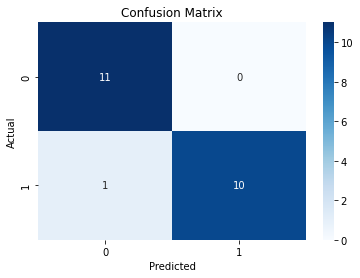

In [26]:
cm = confusion_matrix(p_test, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()